# Two Factor ANOVA


### Green House Gasses
![](https://image.slidesharecdn.com/greenhouseeffect-140109053434-phpapp02/95/greenhouse-effect-1-638.jpg?cb=1389245852)


Considering the __Fertilizer Treatment__ with the addition of the plant specieis impacting the plant height

source: [PSU Stats 502 Factorial Treatment Designs](https://newonlinecourses.science.psu.edu/stat502/node/154/)

In [6]:
# http://www.pybloggers.com/2016/03/three-ways-to-do-a-two-way-anova-with-python/
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

In [22]:
df = pd.read_csv("./data/greenhouse.csv")
df.head()

,fert,species,height
0,control,SppA,21.0
1,control,SppA,19.5
2,control,SppA,22.5
3,control,SppA,21.5
4,control,SppA,20.5


Graph the ferterlizer data to preview/visualize the factoral data. We are using `statsmodels interaction_plot`.

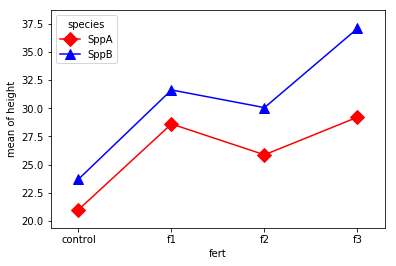

In [12]:
fig = interaction_plot(df.fert, df.species, df.height,
             colors=['red','blue'], markers=['D','^'], ms=10)

In the above interaction graph, the `species` appear to be parallel indicating a __small effact__ in the `control` and as you go from `f1` to `f3` the effect become larger and larger, __with no interaction__

### Two Factor Factorial Model
use the method `type = 3` that provide us the `F test` calculation. 

In [40]:
#formula = 'height ~ C(fert) + C(species) + C(fert):C(species)'
#model = ols(formula, df).fit()
model = ols('height ~ C(fert) + C(species) + C(fert):C(species)', data=df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(fert),745.437500,3.0,73.098232,2.765659e-16
C(species),236.740833,1.0,69.645020,2.706508e-10
C(fert):C(species),50.584167,3.0,4.960326,5.080577e-03
Residual,135.970000,40.0,NaN,NaN


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     43.40
Date:                Fri, 24 May 2019   Prob (F-statistic):           1.02e-16
Time:                        06:43:38   Log-Likelihood:                -93.099
No. Observations:                  48   AIC:                             202.2
Df Residuals:                      40   BIC:                             217.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           21.0000      0.753     27.900      0.000      19.479      22.521
C(fert)[T.f1]                        7.6000      1.064      7.140      0.000       5.449       9.751
C(fert)[T.f2]                        4.8667      1.064      4.572      0.000       2.715       7.018
C(fert)[T.f3]                        8.2000      1.064      7.703      0.000       6.049      10.351
C(species)[T.SppB]                   2.7000      1.064      2.536      0.015       0.549       4.851
C(fert)[T.f1]:C(species)[T.SppB]     0.3167      1.505      0.210      0.834      -2.726       3.359
C(fert)[T.f2]:C(species)[T.SppB]     1.4833      1.505      0.985      0.330      -1.559       4.526
C(fert)[T.f3]:C(species)[T.SppB]     5.1667      1.505      3.432      0.001       2.124       8.209
==============================================================================
Omnibus:                        3.397   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.039
Skew:                          -0.054   Prob(JB):                        0.219
Kurtosis:                       4.228   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

QQ PLot using statsmodels

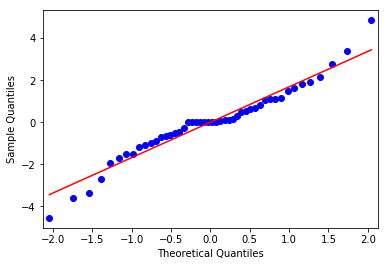

In [29]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()